In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
%load_ext line_profiler
%load_ext memory_profiler

import scqubits as qubit
qubit.settings.MULTIPROC = 'pathos'
#print(qubit.__version__)
import scqubits.utils.sweep_plotting as splot
from scqubits import HilbertSpace, ParameterSweep, InteractionTerm
from scqubits.core.storage import SpectrumData

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [6]:
N = 3
kmax=1
ECB = 0.2 # 100 fF
ECJ = 20.0/2.7 # 2.7 fF
#ECJ = 20.0
ECg = 20.0 # 0.5 fF
flux = 0.0
#EJ = 18.9586
EJ = 10.0
EJlist = np.array([EJ for j in range(2*N)])
nglist = np.array([0.5 for j in range(2*N)])
num_exc = 8
CMV = qubit.CurrentMirrorVCHOS(N, ECB, ECJ, ECg, EJlist, nglist, flux, 
                               kmax=kmax, num_exc=num_exc, squeezing=False, truncated_dim=6)
CMVG = qubit.CurrentMirrorVCHOSGlobal(N, ECB, ECJ, ECg, EJlist, nglist, flux, 
                                      kmax=kmax, global_exc=num_exc, squeezing=False, truncated_dim=6)
CMVGS = qubit.CurrentMirrorVCHOSGlobal(N, ECB, ECJ, ECg, EJlist, nglist, flux, 
                                      kmax=kmax, global_exc=num_exc, squeezing=True, truncated_dim=6)
CM = qubit.CurrentMirror(N, ECB, ECJ, ECg, EJlist, nglist, flux, ncut=5, truncated_dim=6)

In [7]:
inn = CMVG.inner_product()
eigs, _ = sp.linalg.eigh(inn)

KeyboardInterrupt: 

In [ ]:
print(eigs)

In [12]:
inn.shape

(2376, 2376)

In [22]:
for i in range(inn.shape[0]):
    for j in range(i+1, inn.shape[0]):
        if np.abs(inn[i, j]) > 0.2:
            print(i, j, np.abs(inn[i, j]))

792 2369 0.22784240224499208
792 2375 0.20093811181062063
796 2040 0.23342149754358069
796 2042 0.22109244034876396
796 2370 0.22998952336520392
797 1835 0.22162848258516663
797 2039 0.22784240381260684
797 2045 0.2665353202181941
797 2375 0.250277729393189
801 2250 0.2334214962977783
801 2252 0.221092439567072
802 1961 0.2216284848972364
802 2249 0.22784240283182602
802 2255 0.26653532164055105
805 2334 0.23342149603616313
805 2336 0.2210924397667947
806 2017 0.2216284850110908
806 2333 0.227842402406566
806 2339 0.26653532374339006
808 2362 0.2334214960836793
808 2364 0.22109243909567214
809 2038 0.22162848567570487
809 2361 0.2278424022305961
809 2367 0.2665353227003726
810 1707 0.22384916059369542
810 1831 0.20440832073439172
810 2041 0.20397323528881645
810 2043 0.225702879318228
811 1830 0.2334214969711904
811 2041 0.2085106242513706
811 2043 0.20851062477930823
811 2371 0.2050388806654008
812 1709 0.23935442617640737
812 1835 0.2623929126925489
812 2039 0.24689976561740914
812 2

1130 2203 0.20023938247331688
1130 2205 0.22109243302715884
1131 2202 0.20440831457491235
1133 1925 0.2424971552756053
1133 2206 0.2515081247868871
1140 2218 0.20023938172671488
1140 2220 0.22109241922145587
1141 2217 0.20440831840318088
1143 1935 0.2424971340898652
1143 2221 0.25150813198897937
1144 1762 0.20440832914856558
1144 1938 0.20397324359174412
1145 1761 0.20023937320507987
1145 2225 0.2980922721192941
1146 1662 0.22384915571434788
1146 1936 0.20397322763611797
1146 2224 0.2751396695328891
1146 2226 0.26691658647394356
1147 1761 0.2210924451851424
1147 2222 0.20545755333926458
1147 2223 0.20503887369402835
1147 2225 0.28802625823715744
1148 1664 0.23935443045094237
1148 1764 0.25150811583745164
1155 2239 0.20023955291073092
1155 2241 0.22109245323648108
1156 2238 0.20440828703858382
1158 1950 0.24249723607332482
1158 2242 0.25150821759980085
1159 1772 0.2044083211472232
1159 1953 0.203973235064295
1160 1771 0.2002393591882507
1160 2246 0.29809226322169435
1161 1668 0.22384917

1508 2300 0.24249765803997114
1509 1989 0.20440833304612857
1509 2303 0.2039732241415782
1510 1988 0.20023941201941808
1511 1793 0.22384923497576667
1511 2301 0.20397323109245463
1512 1988 0.22109239983372878
1513 1795 0.2393543516379706
1513 1991 0.25150813368986435
1514 1683 0.23342152511124792
1514 1798 0.2299895357320532
1514 1995 0.2054575516987986
1515 1682 0.20440831622081754
1515 1798 0.20851062902165785
1515 1995 0.20503888096294254
1516 1994 0.27513972117995594
1517 1993 0.29809214487646035
1517 1995 0.2880262663763647
1518 1797 0.20851068183357746
1518 1994 0.2669165356643492
1519 1623 0.22162848350664036
1519 1684 0.2623929115237906
1529 2321 0.24249757239522393
1530 2004 0.2044083292122861
1530 2324 0.2039732187986539
1531 2003 0.20023942555700738
1532 1803 0.22384926777177572
1532 2322 0.2039732185092907
1533 2003 0.22109238932823846
1534 1805 0.2393543122211627
1534 2006 0.25150814110622655
1535 1689 0.2334215081711319
1535 1808 0.2299895092881927
1535 2010 0.20545754257

In [15]:
basis_vecs = CMVG._gen_basis_vecs()

In [20]:
basis_vecs[np.mod(2372, 792)]

array([0., 0., 0., 3., 4.])

In [21]:
basis_vecs[np.mod(1041, 792)]

array([0., 0., 0., 2., 3.])

In [17]:
CMVG.sorted_minima()

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.04719755, 1.04719755, 1.04719755, 1.04719755, 1.04719755],
       [5.23598776, 5.23598776, 5.23598776, 5.23598776, 5.23598776]])

In [13]:
mask = np.ones(inn.shape, dtype=bool)
np.fill_diagonal(mask, 0)
max_value = inn[mask].max()
print(max_value)

(0.3214626500428462+4.533850300297013e-18j)


In [4]:
ham = CM.hamiltonian()

In [5]:
density = ham.getnnz() / np.prod(ham.shape)
print(density*CM.hilbertdim()**2)

1825151.0


In [7]:
CMVG.hilbertdim()**2

142884

In [16]:
eigs, _ = sp.linalg.eigh(CMVG.inner_product())
print(eigs)

[-8.92014060e-05  5.54933126e-05  5.54933264e-05  5.54933457e-05
  2.19003269e-02  2.19003269e-02  2.19003269e-02  2.19003269e-02
  2.19003269e-02  2.19003269e-02  2.19003269e-02  1.85100875e-01
  1.85100875e-01  1.85100875e-01  1.85100875e-01  1.85100875e-01
  5.18050091e-01  5.18050091e-01  5.18050095e-01  5.18050095e-01
  5.18050095e-01  5.18050095e-01  5.18050095e-01  5.18050095e-01
  5.18050095e-01  5.18050095e-01  5.18050095e-01  5.21306852e-01
  5.21306852e-01  5.21306852e-01  8.04087574e-01  8.92437205e-01
  8.92437205e-01  8.92437205e-01  8.92437205e-01  8.92437205e-01
  8.92437205e-01  8.92437205e-01  8.92437206e-01  8.92437206e-01
  9.67377483e-01  9.67377483e-01  9.67377483e-01  9.67377483e-01
  9.67377591e-01  9.67377591e-01  9.67377591e-01  9.67377591e-01
  9.67377592e-01  9.67377603e-01  9.67377603e-01  9.67377603e-01
  9.67377603e-01  9.67378470e-01  9.67378470e-01  9.83392507e-01
  9.83392507e-01  9.83392507e-01  9.83392507e-01  9.83392507e-01
  9.83392507e-01  9.83392

In [52]:
CM.eigenvals()

array([55.91260084, 60.03481805, 60.03481866, 63.93311401, 63.9916677 ,
       64.09493829])

In [57]:
print(CM.eigenvals(), CM.nglist)

[55.91260084 60.03481805 60.03481866 63.93311401 63.9916677  64.09493829] [0. 0. 0.]


In [ ]:
for flux in flux_list:
#    EJlist = np.array([EJ for j in range(2*N)])
#    nglist = np.array([0.0 for j in range(2*N)])
    CMV = qubit.CurrentMirrorVCHOS(N, ECB, ECJ, ECg, EJlist, nglist, flux, 
                                          kmax=kmax, num_exc=2, 
                                          squeezing=False, truncated_dim=6)
    CMV.flux=flux
    specdata = CMVG.get_spectrum_vs_paramvals('flux', flux_list, evals_count = 6, 
                                              get_eigenstates=True, num_cpus=3)
    specdata.filewrite("CM_N_"+str(N)+"_n_5_flux.h5")
    print(N)
    

4


5


6


In [17]:
flux_list = np.linspace(0.0, 0.5, 11)
specdata = CMVG.get_spectrum_vs_paramvals('flux', flux_list, evals_count = 6, 
                                              get_eigenstates=True, num_cpus=2)

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f36500dc090>)

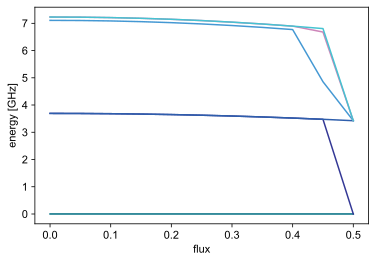

In [19]:
specdata.plot_evals_vs_paramvals(subtract_ground=True)

In [10]:
flux_list = np.linspace(0.0, 0.5, 21)
specdata = CM.get_spectrum_vs_paramvals('flux', flux_list, evals_count = 6, get_eigenstates=True, num_cpus=3)
specdata.filewrite("CM_N_3_n_6_flux.h5")

In [13]:
flux_list = np.linspace(0.0, 0.5, 21)
specdata = CMVG.get_spectrum_vs_paramvals('flux', flux_list, evals_count = 6, get_eigenstates=True, 
                                          num_cpus=3)
specdata.filewrite("CMVG_N_3_n_5_test2.h5")

Process ForkPoolWorker-13:
Process ForkPoolWorker-11:
Process ForkPoolWorker-12:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/dkweiss/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/dkweiss/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/dkweiss/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/dkweiss/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dkweiss/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dkweiss/anaconda3/envs/py37/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/dkweiss/anacond

In [17]:
ED_datafromfile_8 = SpectrumData.create_from_file("CM_N_3_n_8_flux.h5")

In [19]:
vchos_datafromfile_5 = SpectrumData.create_from_file("CMVG_N_3_n_5_test2.h5")
vchos_datafromfile_4 = SpectrumData.create_from_file("CMVG_N_3_n_4_test2.h5")
vchos_datafromfile_3 = SpectrumData.create_from_file("CMVG_N_3_n_3_test2.h5")
vchos_datafromfile_2 = SpectrumData.create_from_file("CMVG_N_3_n_2_test2.h5")

In [13]:
vchos_datafromfile_4 = SpectrumData.create_from_file("CM_N_4n_5_flux.h5")
vchos_datafromfile_5 = SpectrumData.create_from_file("CM_N_5n_5_flux.h5")
vchos_datafromfile_6 = SpectrumData.create_from_file("CM_N_6n_5_flux.h5")
vchos_datafromfile_7 = SpectrumData.create_from_file("CM_N_7n_5_flux.h5")

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbe28278910>)

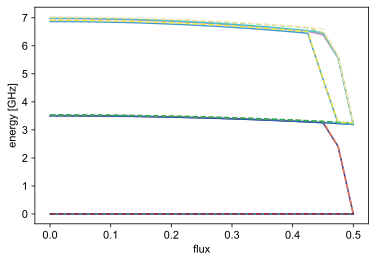

In [28]:
fig, axes = ED_datafromfile_8.plot_evals_vs_paramvals(subtract_ground=True)
#vchos_datafromfile_5.plot_evals_vs_paramvals(subtract_ground=True, fig_ax=[fig, axes], linestyle='-.')
vchos_datafromfile_4.plot_evals_vs_paramvals(subtract_ground=True, fig_ax=[fig, axes], linestyle='--')

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f36521d2850>)

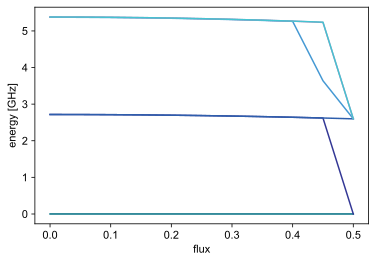

In [14]:
vchos_datafromfile_4.plot_evals_vs_paramvals(subtract_ground=True)

In [8]:
print(datafromfile.state_table[0][0])

[ 9.97552811e-01+0.j -1.04133692e-16+0.j  1.82897008e-16+0.j
 -2.53374904e-15+0.j -4.40978258e-02+0.j  2.28694866e-12+0.j]


In [10]:
print(datafromfile.system_params)

{'ECB': 0.2, 'ECJ': 7.4074074074074066, 'ECg': 20.0, 'N': 3, 'flux': 0.0, 'global_exc': 2, 'kmax': 1, 'squeezing': False, 'truncated_dim': 6, 'EJlist': array([18.9586, 18.9586, 18.9586, 18.9586, 18.9586, 18.9586]), 'nglist': array([0., 0., 0., 0., 0.])}


In [33]:
phik_1 = np.array([-1, 0, 1, -1, 0])
phik_2 = np.array([-1, 1, 0, -1, 1])
phik_3 = np.array([0, -1, 1, 0, -1])
#print(np.dot(np.array([-1, 0, 1, -1, 0]), np.array([-1, 1, 0, -1, 1]))/(np.sqrt(3)*2))
dpkX_1 = np.matmul(delta_inv, phik_1)
dpkX_2 = np.matmul(delta_inv, phik_2)
dpkX_3 = np.matmul(delta_inv, phik_3)
print(dpkX_1, dpkX_2, dpkX_3)

[-1.19903871e+00 -5.99519356e-01  4.88498131e-15 -1.19903871e+00
 -5.99519356e-01] [-5.99519356e-01  5.99519356e-01  8.88178420e-16 -5.99519356e-01
  5.99519356e-01] [-5.99519356e-01 -1.19903871e+00  3.55271368e-15 -5.99519356e-01
 -1.19903871e+00]


In [44]:
Xi = CMVG.Xi_matrix()
Xi_inv = sp.linalg.inv(Xi)
evalsxi, evecsxi = sp.linalg.eig(Xi_inv)
#print(Xi_inv)
print(evalsxi)
print(evecsxi)
delta_inv = np.matmul(Xi_inv.T, Xi_inv)
#print(delta_inv)
evals, evecs = sp.linalg.eigh(delta_inv)
print(evals)
#print(evecs[:,2])
#print(evecs[:,3])
print(evecs[:,0])
print(evecs[:,1])

[ 3.40554675+0.j          1.04295503+0.61359158j  1.04295503-0.61359158j
  0.02596119+1.43551626j  0.02596119-1.43551626j -1.65041704+0.j
 -1.36487496+0.j        ]
[[-0.43589145+0.j         -0.17441221-0.28040948j -0.17441221+0.28040948j
  -0.29839499-0.40679528j -0.29839499+0.40679528j -0.68056919+0.j
   0.35180214+0.j        ]
 [-0.70632377+0.j          0.25330516+0.37097416j  0.25330516-0.37097416j
  -0.14102344+0.29700037j -0.14102344-0.29700037j -0.16005921+0.j
   0.41240495+0.j        ]
 [-0.4462041 +0.j         -0.4502077 +0.09414549j -0.4502077 -0.09414549j
  -0.2540201 -0.17086302j -0.2540201 +0.17086302j  0.64037869+0.j
  -0.60560243+0.j        ]
 [-0.19868068+0.j          0.20834793+0.00703964j  0.20834793-0.00703964j
   0.5829043 +0.j          0.5829043 -0.j          0.05874976+0.j
  -0.21737439+0.j        ]
 [ 0.10606262+0.j          0.15801112-0.38720884j  0.15801112+0.38720884j
  -0.13832726-0.0735677j  -0.13832726+0.0735677j   0.18650308+0.j
  -0.0536571 +0.j        ]
 

In [34]:
hilbertspcvchos = HilbertSpace([CMVG])
hilbertspcvchos.interaction_list = []
points = 11
param_name = 'ng'
param_vals = np.linspace(0.0, 1.0, points)

subsys_update_list = [CMVG]

def update_hilbertspace(param_val):
    nglist = np.zeros(2*N)
    nglist[0] = param_val
#    nglist = np.array([param_val for _ in range(2*N)])
    V_m = CMVG._build_V_m()
    CMVG.nglist = np.dot(sp.linalg.inv(V_m).T, nglist)[0:-1]

    
sweep = ParameterSweep(param_name=param_name, param_vals=param_vals,
                       evals_count=6, hilbertspace=hilbertspcvchos,
                       subsys_update_list=subsys_update_list,
                       update_hilbertspace=update_hilbertspace, num_cpus=2)

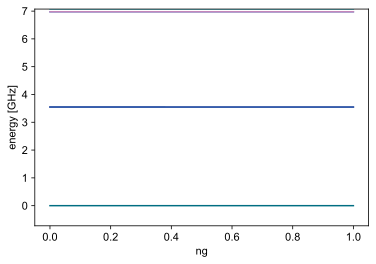

In [35]:
fig, axes = splot.dressed_spectrum(sweep)

In [33]:
hilbertspcED = HilbertSpace([CM])
hilbertspcED.interaction_list = []
points = 11
param_vals = np.linspace(0.0, 1.0, points)

subsys_update_list = [CM]

param_name = "n_g"
def update_hilbertspace(param_val):
    nglist = np.zeros(2*N)
    nglist[0] = param_val
#    nglist = np.array([param_val for _ in range(2*N)])
    V_m = CM._build_V_m()
    CM.nglist = np.dot(sp.linalg.inv(V_m).T, nglist)[0:-1]
    
sweepED = ParameterSweep(param_name=param_name, param_vals=param_vals,
                       evals_count=6, hilbertspace=hilbertspcED,
                       subsys_update_list=subsys_update_list,
                       update_hilbertspace=update_hilbertspace)

In [37]:
axes.properties()['children'][4].set_linestyle('--')
axes.properties()['children'][5].set_linestyle('--')
axes.properties()['children'][6].set_linestyle('--')
axes.properties()['children'][7].set_linestyle('--')

In [ ]:
splot.dressed_spectrum(sweepED, ylim=(-1,12), fig_ax = [fig, axes])[0]

In [ ]:
sweepED.dressed_specdata.energy_table

In [ ]:
flux_list = np.linspace(0.4, 0.5, 11)
CMVG.plot_evals_vs_paramvals('flux', flux_list, evals_count=6, subtract_ground=False)

In [ ]:
flux_list = np.linspace(0.0, 1.0, 21)
fig, axes = CM.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False)
CMVG.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False, fig_ax=[fig, axes])
axes.properties()['children'][4].set_linestyle('--')
axes.properties()['children'][5].set_linestyle('--')
axes.properties()['children'][6].set_linestyle('--')
axes.properties()['children'][7].set_linestyle('--')

In [ ]:
x = np.array([[0,1], [1,0]])
xs = np.array([x, x])
print(xs)
np.matrix.prod(xs, axis=0)

In [ ]:
%mprun -f CMVG.kineticmat CMVG.kineticmat()

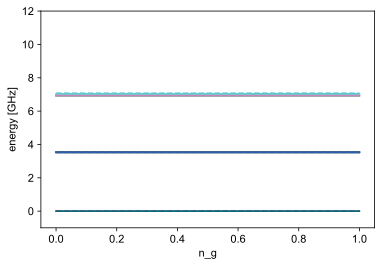

In [38]:
%lprun -f CMVG.kineticmat CMVG.kineticmat()

In [39]:
sweepED.dressed_specdata.energy_table

array([[14.78490403, 18.3063538 , 18.30635382, 21.70266737, 21.7135392 ,
        21.81672078],
       [14.78491399, 18.30636864, 18.30636867, 21.70269299, 21.71356163,
        21.81674363],
       [14.7849429 , 18.3064117 , 18.30641176, 21.70276733, 21.71362673,
        21.81680994],
       [14.78498793, 18.30647877, 18.30647888, 21.70288307, 21.71372815,
        21.81691318],
       [14.78504467, 18.3065633 , 18.30656346, 21.70302883, 21.71385596,
        21.81704317],
       [14.78510757, 18.30665702, 18.30665722, 21.70319028, 21.71399768,
        21.81718715],
       [14.78517047, 18.30675076, 18.30675098, 21.70335157, 21.71413945,
        21.81733097],
       [14.78522721, 18.30683535, 18.30683556, 21.70349693, 21.71426739,
        21.81746056],
       [14.78527224, 18.3069025 , 18.30690267, 21.70361216, 21.71436898,
        21.81756326],
       [14.78530116, 18.30694564, 18.30694576, 21.70368609, 21.71443426,
        21.81762911],
       [14.78531112, 18.30696052, 18.30696061, 21.

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2c5e6d64d0>)

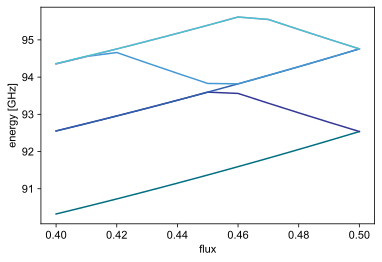

In [6]:
flux_list = np.linspace(0.4, 0.5, 11)
CMVG.plot_evals_vs_paramvals('flux', flux_list, evals_count=6, subtract_ground=False)

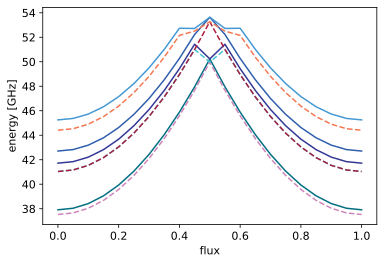

In [4]:
flux_list = np.linspace(0.0, 1.0, 21)
fig, axes = CM.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False)
CMVG.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False, fig_ax=[fig, axes])
axes.properties()['children'][4].set_linestyle('--')
axes.properties()['children'][5].set_linestyle('--')
axes.properties()['children'][6].set_linestyle('--')
axes.properties()['children'][7].set_linestyle('--')

In [24]:
x = np.array([[0,1], [1,0]])
xs = np.array([x, x])
print(xs)
np.matrix.prod(xs, axis=0)

[[[0 1]
  [1 0]]

 [[0 1]
  [1 0]]]


AttributeError: 'numpy.ndarray' object has no attribute '_collapse'

In [6]:
%mprun -f CMVG.kineticmat CMVG.kineticmat()

In [7]:
%lprun -f CMVG.kineticmat CMVG.kineticmat()

*** KeyboardInterrupt exception caught in code being profiled.

In [3]:
a_op_list = np.array([CMVG.a_operator(i) for i in range(CMVG.num_deg_freedom)])
minima_list = CMVG.sorted_minima()
minima_diff = minima_list[1]-minima_list[2]
Xi = CMVG.Xi_matrix()
%lprun -f CMVG._build_squeezing_ops CMVG._build_squeezing_ops(1, 2, minima_diff, Xi, a_op_list)

In [7]:
%lprun -f CMVG.potentialmat CMVG.potentialmat()

In [28]:
%lprun -f CMV.potentialmat CMV.potentialmat()

In [26]:
%lprun -f CMV.hamiltonian CMV.hamiltonian()

In [5]:
eigvals = CMV.eigenvals()
print(eigvals)

[37.51394954 41.0467031  41.04677482 44.44385195 44.54820087 44.56440727]


In [7]:
eigvals = CMV.eigenvals()
print(eigvals-eigvals[0])

[0.         2.79611152 2.81102498 5.58158613 5.59865452 5.60723912]


In [3]:
evals_holder_vchos = []
for ncut in range(1, 4):
    print(ncut)
    CMVG = qubit.CurrentMirrorVCHOSGlobal(N, ECB, ECJ, ECg, EJlist, nglist, flux, 
                                           kmax=1, global_exc=ncut, squeezing=False)
    evals = CMVG.eigenvals()
    evals_holder_vchos.append(evals)

1
2
3


In [4]:
evals_holder_ED = []
for ncut in range(1, 6):
    print(ncut)
    CM = qubit.CurrentMirror(N, ECB, ECJ, ECg, EJlist, nglist, flux, ncut=ncut)
    evals = CM.eigenvals()
    evals_holder_ED.append(evals)

1
2
3
4
5


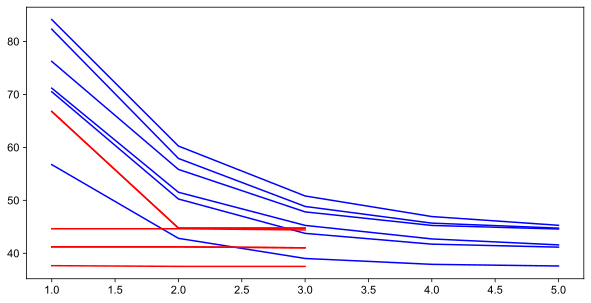

In [5]:
ncut_list = np.arange(1, 6)
fig,ax = plt.subplots(figsize=(10,5))
plt.plot(ncut_list, evals_holder_ED, color="blue")
plt.plot(ncut_list[0:3], evals_holder_vchos, color="red")
plt.show()

In [11]:
print(evals_holder)

[array([56.70140312, 70.46042775, 71.13782448, 76.19151844, 82.26184779,
       84.08820282]), array([42.80612023, 50.22657124, 51.50082666, 55.82116382, 57.87979284,
       60.22545979]), array([39.01382439, 43.75076327, 45.25837763, 47.81235394, 48.82732037,
       50.8098161 ]), array([37.91111698, 41.7203811 , 42.70902272, 45.25314106, 45.68702751,
       46.93290294]), array([37.60014853, 41.15974483, 41.58172879, 44.58520793, 44.7446738 ,
       45.28091933]), array([37.52073588, 41.03067135, 41.1629697 , 44.41647763, 44.52028604,
       44.689744  ])]


## Nearest Neighbor Calc 

In [13]:
def x0p(x0, y0, theta):
    return (x0*np.cos(theta)-y0*np.sin(theta))
def y0p(x0, y0, theta):
    return (x0*np.sin(theta)+y0*np.cos(theta))
def result(x0, y0, alpha, theta):
    return alpha*np.exp(-0.25*x0p(x0, y0, theta)**2)*np.exp(-0.25*(y0p(x0, y0, theta)/alpha)**2)
num = 100
mat = np.zeros((num, num))
for i, theta in enumerate(np.linspace(0, np.pi/2, num)):
    for j, e in enumerate(np.linspace(0.01, 1.0, num)):
        alpha = np.sqrt(1-e**2)
        nn_1 = result(2*np.pi, 0, alpha, theta)
        nn_2 = result(-2*np.pi, 0, alpha, theta)
        nn_3 = result(0, 2*np.pi, alpha, theta)
        nn_4 = result(0, -2*np.pi, alpha, theta)
        nn_max = np.max(np.array([nn_1, nn_2, nn_3, nn_4]))
        
        next_nn_1 = result(2*np.pi, 2*np.pi, alpha, theta)
        next_nn_2 = result(-2*np.pi, 2*np.pi, alpha, theta)
        next_nn_3 = result(2*np.pi, -2*np.pi, alpha, theta)
        next_nn_4 = result(-2*np.pi, -2*np.pi, alpha, theta)
        next_nn_max = np.max(np.array([next_nn_1, next_nn_2, next_nn_3, next_nn_4]))
        if next_nn_max > nn_max:
            mat[i, j] = 1.0
        else:
            mat[i, j] = -1.0

/home/dkweiss/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/home/dkweiss/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


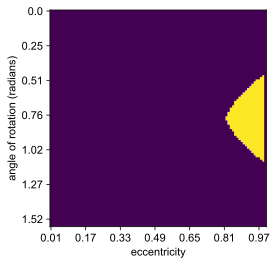

In [14]:
plt.imshow(mat)
x = np.linspace(0.01, 1.0, num)
y = np.linspace(0, np.pi/2, num)
nx = x.shape[0]
ny = y.shape[0]
no_labels = 7 # how many labels to see on axis x
step = int(nx / (no_labels - 1))
x_positions = np.arange(0,nx,step) # pixel count at label position
y_positions = np.arange(0,ny,step)
x_labels = np.round(x, decimals=2)[::step] # labels you want to see
y_labels = np.round(y, decimals=2)[::step]
plt.xticks(x_positions, x_labels)
plt.yticks(y_positions, y_labels)
plt.xlabel("eccentricity")
plt.ylabel("angle of rotation (radians)")
plt.show()